In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import libpysal
import scipy as sp
import mapclassify
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#load slum_training_grids and combine the two datasets 
data_path = '/home/jovyan/private/Thesis/nai_train_data/'
slum_train_grids = gpd.read_file(data_path + 'slum100m_train_grids.shp')
formal_train_grids = gpd.read_file(data_path + 'selected_formal_grids.shp')

In [3]:
slum_train_grids.head(), slum_train_grids.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin  Dist_Col  Dist_ComC  Dist_Dump  \
 0      1617   2817.80     2247.22    223.607   3448.19    6293.65    6555.15   
 1      1679   2865.31     2302.17    282.843   3361.55    6198.39    6462.20   
 2      1680   2778.49     2220.36    223.607   3413.21    6229.77    6500.00   
 3      1681   2692.58     2140.09    200.000   3466.99    6262.59    6539.11   
 4      1682   2607.68     2061.55    223.607   3522.78    6296.82    6579.51   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bERI_Gini_  bERI_Shann  bERI_Simps  \
 0    3324.15     200.000    5772.35  ...    0.009133    0.795896    0.600086   
 1    3231.10     300.000    5675.39  ...    0.010595    0.691308    0.651585   
 2    3269.56     316.228    5700.88  ...    0.014465    0.743112    0.617063   
 3    3300.00     360.555    5728.00  ...    0.015627    0.785863    0.589049   
 4    3301.51     400.000    5756.74  ...    0.012894    0.884709    0.530561   
 
    bERI_Theil  grid_are

In [4]:
formal_train_grids.head(), formal_train_grids.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin   Dist_Col  Dist_ComC  Dist_Dump  \
 0     31226  13152.90    4726.520    4925.44  16422.200    565.685   16924.80   
 1     35556  10632.00    2420.740    2580.70  14011.800   3255.760   14454.40   
 2     14894   1843.91     509.902    1486.61    984.886   1746.420    1100.00   
 3      3623   2376.97     447.214    2668.33   4741.310   6964.190    7810.25   
 4     36849  15305.60    6937.580    7130.92  18681.500   1200.000   19105.00   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bERI_Gini_  bERI_Shann  bERI_Simps  \
 0    3801.32    5515.430  16056.200  ...    0.017469    0.507985    0.699082   
 1    1486.61    4396.590  13670.400  ...    0.015446    0.527425    0.705740   
 2    1166.19     707.107   1081.670  ...    0.011864    0.371422    0.802572   
 3    2475.88    2785.680    707.107  ...    0.012713    0.480893    0.763273   
 4    5966.57    7864.480  18324.000  ...    0.009424    0.632054    0.672861   
 
    bERI_Theil  gr

<AxesSubplot: >

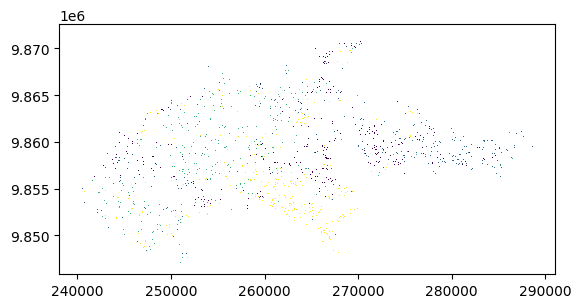

In [5]:
formal_train_grids.plot(column = 'clusters_4')

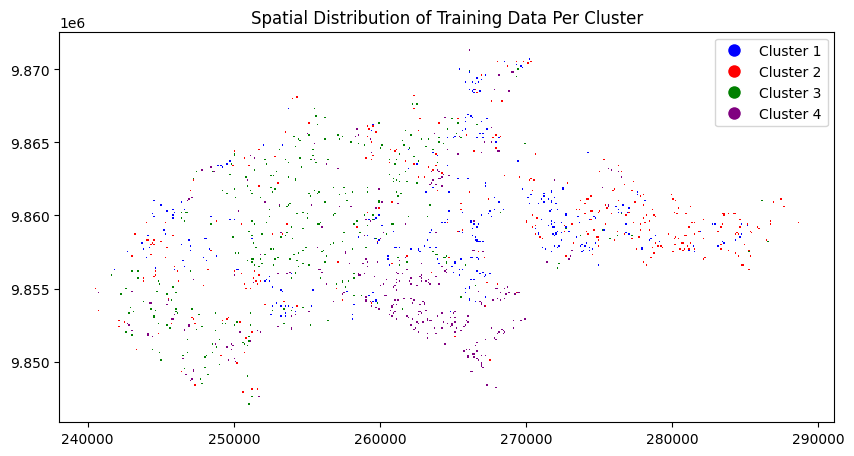

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming 'formal_train_grids' is your GeoDataFrame and it includes a 'clusters_4' column with values 0, 1, 2, and 3
# Separate the blocks into GeoDataFrames based on the 'clusters_4' column
cluster_1 = formal_train_grids[formal_train_grids['clusters_4'] == 0]
cluster_2 = formal_train_grids[formal_train_grids['clusters_4'] == 1]
cluster_3 = formal_train_grids[formal_train_grids['clusters_4'] == 2]
cluster_4 = formal_train_grids[formal_train_grids['clusters_4'] == 3]

# Create a plot with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

cluster_1.plot(ax=ax, color='blue', label='Cluster 1')
cluster_2.plot(ax=ax, color='red', label='Cluster 2')
cluster_3.plot(ax=ax, color='green', label='Cluster 3')
cluster_4.plot(ax=ax, color='purple', label='Cluster 4')

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Cluster 1',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 2',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 3',
           markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 4',
           markerfacecolor='purple', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Cluster')

# Show the plot
plt.show()


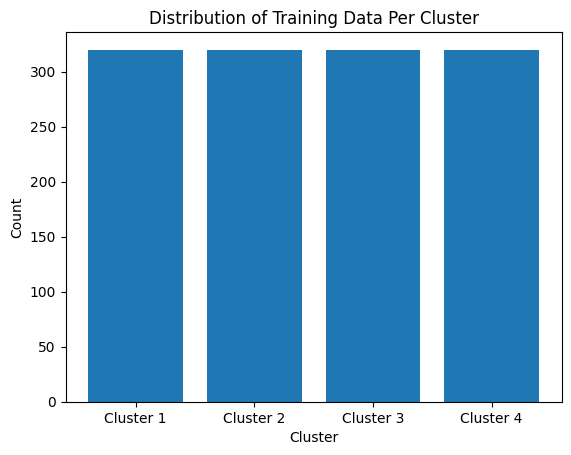

In [8]:
# Assuming 'df' is your DataFrame and it includes a 'class' column with 0s and 1s
class_counts = formal_train_grids['clusters_4'].value_counts().sort_index()

# class_counts = Train_Set['class'].value_counts().sort_index()
# Create a bar plot
plt.bar(class_counts.index, class_counts.values)

# Set the labels for the x-axis to 'Formal Grids' and 'Slum Grids'
plt.xticks(class_counts.index, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Training Data Per Cluster')

# Show the plot
plt.show()

In [9]:
formal_train_grids['class'] = 0
formal_train_grids.head()

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,intersecti,coverage_p,clusters_4,geometry,class
0,31226,13152.90,4726.520,4925.44,16422.200,565.685,16924.80,3801.32,5515.430,16056.200,...,0.507985,0.699082,0.002039,10000.0,0.0014,10000.000000,100.000000,1,"POLYGON ((281883.509 9858865.525, 281783.509 9...",0
1,35556,10632.00,2420.740,2580.70,14011.800,3255.760,14454.40,1486.61,4396.590,13670.400,...,0.527425,0.705740,0.001028,10000.0,0.0014,10000.000000,100.000000,1,"POLYGON ((279083.509 9857865.525, 278983.509 9...",0
2,14894,1843.91,509.902,1486.61,984.886,1746.420,1100.00,1166.19,707.107,1081.670,...,0.371422,0.802572,0.001142,10000.0,0.0002,10000.000000,100.000000,1,"POLYGON ((263083.509 9862565.525, 262983.509 9...",0
3,3623,2376.97,447.214,2668.33,4741.310,6964.190,7810.25,2475.88,2785.680,707.107,...,0.480893,0.763273,0.001246,10000.0,0.0007,9795.127223,97.951272,1,"POLYGON ((255183.509 9866265.525, 255083.509 9...",0
4,36849,15305.60,6937.580,7130.92,18681.500,1200.000,19105.00,5966.57,7864.480,18324.000,...,0.632054,0.672861,0.000482,10000.0,0.0006,10000.000000,100.000000,1,"POLYGON ((283883.509 9857565.525, 283783.509 9...",0


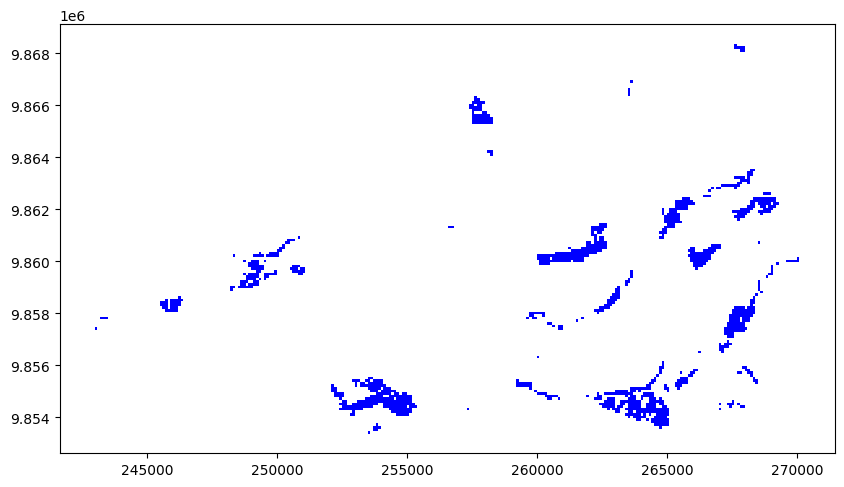

In [10]:
# Plot the non-intersecting grids
ax = slum_train_grids.plot(color='blue', figsize=(10, 10), label='slum Grids')


<AxesSubplot: >

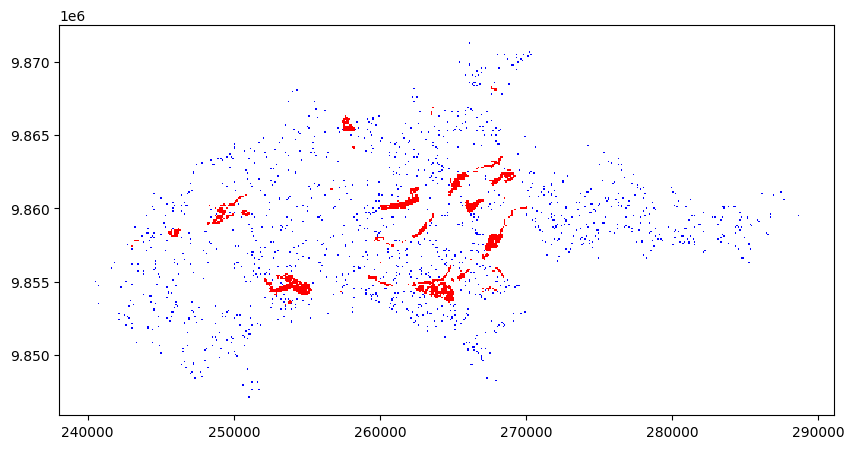

In [11]:
# Plot the non-intersecting grids
ax = formal_train_grids.plot(color='blue', figsize=(10, 10), label='Non-Intersecting Grids')

# Plot the slum grids on the same plot
slum_train_grids.plot(ax=ax, color='red', label='Slum Grids')


# Show the plot
# plt.show()

In [12]:
slum_train_grids.columns

Index(['ORIG_FID', 'Dist_ATM', 'Dist_Banks', 'Dist_Clin', 'Dist_Col',
       'Dist_ComC', 'Dist_Dump', 'Dist_Hosp', 'Dist_Indus', 'Dist_Kind',
       ...
       'bERI_Gini_', 'bERI_Shann', 'bERI_Simps', 'bERI_Theil', 'grid_area',
       'blg_densit', 'index_righ', 'NAME_2', 'class', 'geometry'],
      dtype='object', length=122)

In [13]:
columns_to_drop = [ 'grid_area', 'index_righ', 'NAME_2']
slum_train_grids = slum_train_grids.drop(columns=columns_to_drop)
slum_train_grids.head(),slum_train_grids.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin  Dist_Col  Dist_ComC  Dist_Dump  \
 0      1617   2817.80     2247.22    223.607   3448.19    6293.65    6555.15   
 1      1679   2865.31     2302.17    282.843   3361.55    6198.39    6462.20   
 2      1680   2778.49     2220.36    223.607   3413.21    6229.77    6500.00   
 3      1681   2692.58     2140.09    200.000   3466.99    6262.59    6539.11   
 4      1682   2607.68     2061.55    223.607   3522.78    6296.82    6579.51   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    3324.15     200.000    5772.35  ...    0.367693    0.794343    2.344955   
 1    3231.10     300.000    5675.39  ...    0.345436    0.822692    2.802729   
 2    3269.56     316.228    5700.88  ...    0.353943    0.810559    2.273620   
 3    3300.00     360.555    5728.00  ...    0.364804    0.789322    2.082338   
 4    3301.51     400.000    5756.74  ...    0.439386    0.744778    2.288385   
 
    bERI_Gini_  bERI_Sha

In [14]:
formal_train_grids.columns

Index(['ORIG_FID', 'Dist_ATM', 'Dist_Banks', 'Dist_Clin', 'Dist_Col',
       'Dist_ComC', 'Dist_Dump', 'Dist_Hosp', 'Dist_Indus', 'Dist_Kind',
       ...
       'bERI_Shann', 'bERI_Simps', 'bERI_Theil', 'grid_area', 'blg_densit',
       'intersecti', 'coverage_p', 'clusters_4', 'geometry', 'class'],
      dtype='object', length=123)

In [15]:
columns_to_drop = [ 'intersecti', 'coverage_p', 'clusters_4', 'grid_area']
formal_train_grids = formal_train_grids.drop(columns=columns_to_drop)
formal_train_grids.head(),formal_train_grids.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin   Dist_Col  Dist_ComC  Dist_Dump  \
 0     31226  13152.90    4726.520    4925.44  16422.200    565.685   16924.80   
 1     35556  10632.00    2420.740    2580.70  14011.800   3255.760   14454.40   
 2     14894   1843.91     509.902    1486.61    984.886   1746.420    1100.00   
 3      3623   2376.97     447.214    2668.33   4741.310   6964.190    7810.25   
 4     36849  15305.60    6937.580    7130.92  18681.500   1200.000   19105.00   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    3801.32    5515.430  16056.200  ...    0.053395    0.978741    3.612261   
 1    1486.61    4396.590  13670.400  ...    0.000000    1.000000    2.415003   
 2    1166.19     707.107   1081.670  ...    0.000000    1.000000    3.876373   
 3    2475.88    2785.680    707.107  ...    0.067411    0.973232    3.584198   
 4    5966.57    7864.480  18324.000  ...    0.106935    0.957815    3.878873   
 
    bERI_Gini_  bE

In [16]:
# Assuming 'df' is your DataFrame
cols = formal_train_grids.columns.tolist()
# Remove 'class' and 'geometry' from the list
cols.remove('class')
cols.remove('geometry')
# Add 'class' before 'geometry'
cols.append('class')
cols.append('geometry')
# Reindex the DataFrame with the new column order
formal_train_grids = formal_train_grids[cols]
formal_train_grids.head(), formal_train_grids.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin   Dist_Col  Dist_ComC  Dist_Dump  \
 0     31226  13152.90    4726.520    4925.44  16422.200    565.685   16924.80   
 1     35556  10632.00    2420.740    2580.70  14011.800   3255.760   14454.40   
 2     14894   1843.91     509.902    1486.61    984.886   1746.420    1100.00   
 3      3623   2376.97     447.214    2668.33   4741.310   6964.190    7810.25   
 4     36849  15305.60    6937.580    7130.92  18681.500   1200.000   19105.00   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    3801.32    5515.430  16056.200  ...    0.053395    0.978741    3.612261   
 1    1486.61    4396.590  13670.400  ...    0.000000    1.000000    2.415003   
 2    1166.19     707.107   1081.670  ...    0.000000    1.000000    3.876373   
 3    2475.88    2785.680    707.107  ...    0.067411    0.973232    3.584198   
 4    5966.57    7864.480  18324.000  ...    0.106935    0.957815    3.878873   
 
    bERI_Gini_  bE

In [17]:
#save the slum train grids
save_path = '/home/jovyan/private/Thesis/nai_train_data/'

slum_train_grids.to_file(save_path + 'slums_trainV2.shp')

formal_train_grids.to_file(save_path + 'formal_trainV3.shp')

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin   Dist_Col  Dist_ComC  Dist_Dump  \
 0     31226  13152.90    4726.520    4925.44  16422.200    565.685   16924.80   
 1     35556  10632.00    2420.740    2580.70  14011.800   3255.760   14454.40   
 2     14894   1843.91     509.902    1486.61    984.886   1746.420    1100.00   
 3      3623   2376.97     447.214    2668.33   4741.310   6964.190    7810.25   
 4     36849  15305.60    6937.580    7130.92  18681.500   1200.000   19105.00   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    3801.32    5515.430  16056.200  ...    0.053395    0.978741    3.612261   
 1    1486.61    4396.590  13670.400  ...    0.000000    1.000000    2.415003   
 2    1166.19     707.107   1081.670  ...    0.000000    1.000000    3.876373   
 3    2475.88    2785.680    707.107  ...    0.067411    0.973232    3.584198   
 4    5966.57    7864.480  18324.000  ...    0.106935    0.957815    3.878873   
 
    bERI_Gini_  bE

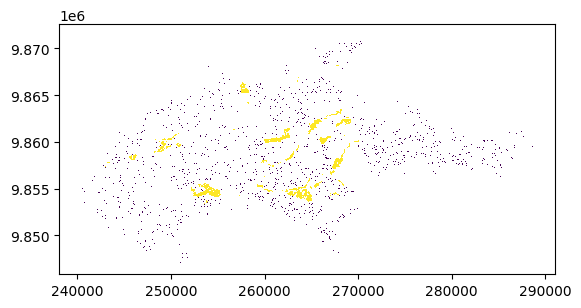

In [18]:
# Merge the GeoDataFrames on the 'common_id' column
# Concatenate the GeoDataFrames
combined_gdf = gpd.GeoDataFrame(pd.concat([formal_train_grids, slum_train_grids]))
combined_gdf.head(), combined_gdf.shape,combined_gdf.plot(column = 'class')

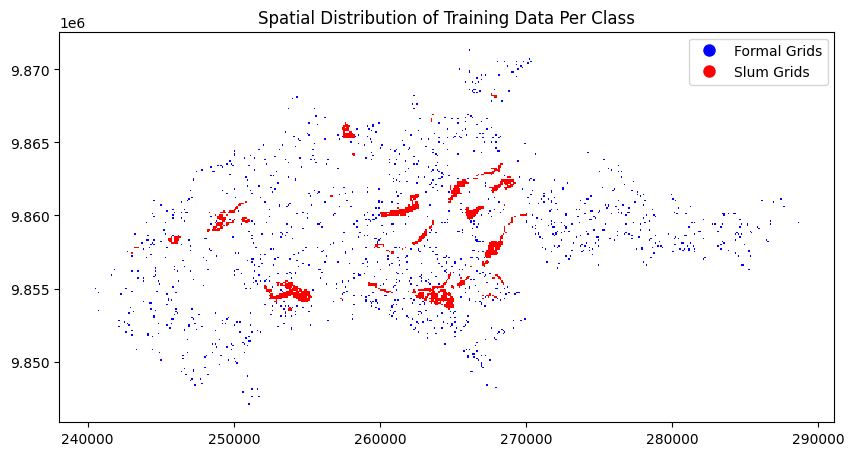

In [19]:
from matplotlib.lines import Line2D

# Assuming 'gdf' is your GeoDataFrame
formal_grids = combined_gdf[combined_gdf['class'] == 0]
slum_grids = combined_gdf[combined_gdf['class'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Class')

# Show the plot
plt.show()


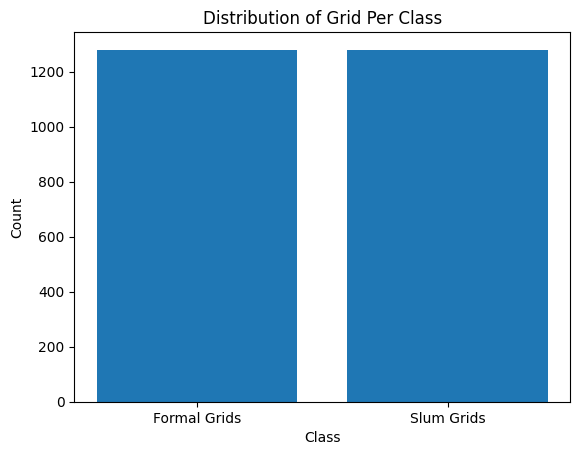

In [20]:
# Assuming 'df' is your DataFrame and it includes a 'class' column with 0s and 1s
class_counts = combined_gdf['class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values)

# Set the labels for the x-axis to 'Formal Grids' and 'Slum Grids'
plt.xticks(class_counts.index, ['Formal Grids', 'Slum Grids'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Grid Per Class')

# Show the plot
plt.show()


In [32]:
#save the slum train grids
save_path = '/home/jovyan/private/Thesis/nai_train_data/'
combined_gdf.to_file(save_path + 'train_dataV3.shp')

In [21]:
combined_gdf

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,geometry
0,31226,13152.900,4726.520,4925.440,16422.200,565.685,16924.800,3801.320,5515.430,16056.200,...,0.053395,0.978741,3.612261,0.017469,0.507985,0.699082,0.002039,0.0014,0,"POLYGON ((281883.509 9858865.525, 281783.509 9..."
1,35556,10632.000,2420.740,2580.700,14011.800,3255.760,14454.400,1486.610,4396.590,13670.400,...,0.000000,1.000000,2.415003,0.015446,0.527425,0.705740,0.001028,0.0014,0,"POLYGON ((279083.509 9857865.525, 278983.509 9..."
2,14894,1843.910,509.902,1486.610,984.886,1746.420,1100.000,1166.190,707.107,1081.670,...,0.000000,1.000000,3.876373,0.011864,0.371422,0.802572,0.001142,0.0002,0,"POLYGON ((263083.509 9862565.525, 262983.509 9..."
3,3623,2376.970,447.214,2668.330,4741.310,6964.190,7810.250,2475.880,2785.680,707.107,...,0.067411,0.973232,3.584198,0.012713,0.480893,0.763273,0.001246,0.0007,0,"POLYGON ((255183.509 9866265.525, 255083.509 9..."
4,36849,15305.600,6937.580,7130.920,18681.500,1200.000,19105.000,5966.570,7864.480,18324.000,...,0.106935,0.957815,3.878873,0.009424,0.632054,0.672861,0.000482,0.0006,0,"POLYGON ((283883.509 9857565.525, 283783.509 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,51069,400.000,1503.330,824.621,1000.000,921.954,761.577,509.902,4219.000,2879.240,...,0.493821,0.691906,1.836874,0.017150,1.041958,0.449976,0.001599,0.0058,1,"POLYGON ((253983.509 9853565.525, 253883.509 9..."
1276,51177,583.095,1334.170,640.312,200.000,200.000,538.516,223.607,412.311,360.555,...,0.081175,0.966807,3.646194,0.025851,0.559568,0.648453,0.003053,0.0022,1,"POLYGON ((264783.509 9853565.525, 264683.509 9..."
1277,51413,360.555,1627.880,894.427,921.954,984.886,894.427,500.000,4410.220,2912.040,...,0.345990,0.796710,1.855234,0.021591,0.984512,0.460472,0.002571,0.0065,1,"POLYGON ((253783.509 9853465.525, 253683.509 9..."
1278,51414,316.228,1612.450,905.539,989.950,1029.560,894.427,447.214,4310.450,2941.090,...,0.468822,0.730405,2.734826,0.017315,0.964311,0.489892,0.001580,0.0065,1,"POLYGON ((253883.509 9853465.525, 253783.509 9..."


In [22]:
path_3 = '/home/jovyan/private/Thesis/nai_100m_w_all_predictors.shapefile/'
grids_df = gpd.read_file(path_3 + 'nai_100m_w_all_predictors.shp')

In [23]:
grids_df

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,geometry
0,5,4188.08,3764.31,3700.00,6637.02,9642.09,9800.51,6676.08,1627.88,9208.69,...,0.348832,0.802469,2.197223,0.014916,0.348832,0.802469,0.001174,10000.0,0.0001,"POLYGON ((266683.509 9871865.525, 266583.509 9..."
1,16,3966.11,3546.83,3544.01,6562.01,9563.47,9732.42,6612.11,1581.14,9119.76,...,0.416021,0.798978,2.246105,0.013299,0.416021,0.798978,0.001320,10000.0,0.0002,"POLYGON ((266883.509 9871765.525, 266783.509 9..."
2,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,0.218885,0.903384,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,"POLYGON ((266983.509 9871665.525, 266883.509 9..."
3,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,0.288721,0.873309,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,"POLYGON ((267083.509 9871665.525, 266983.509 9..."
4,43,3661.97,3255.76,3373.43,6511.53,9503.68,9688.14,6537.58,1552.42,9044.89,...,0.260467,0.869114,2.664485,0.005963,0.483687,0.759725,0.000246,10000.0,0.0007,"POLYGON ((267183.509 9871665.525, 267083.509 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39683,71862,11353.00,13395.90,11292.90,14066.30,13867.90,14649.20,13537.00,9104.94,14342.20,...,0.562335,0.625000,1.386294,0.099460,0.562335,0.625000,0.029423,10000.0,0.0001,"POLYGON ((272783.509 9841665.525, 272683.509 9..."
39684,71877,11448.10,13482.60,11370.10,14151.00,13951.70,14734.00,13621.30,9183.14,14426.70,...,0.950271,0.440000,1.282146,0.089330,0.673012,0.520000,0.023550,10000.0,0.0001,"POLYGON ((272783.509 9841565.525, 272683.509 9..."
39685,71905,11669.20,13705.80,11588.40,14373.60,14173.90,14956.60,13843.80,9402.13,14649.20,...,0.867563,0.500000,1.464467,0.076979,0.636514,0.555556,0.020161,10000.0,0.0001,"POLYGON ((272883.509 9841365.525, 272783.509 9..."
39686,71919,11795.30,13842.30,11729.00,14511.40,14312.20,15094.40,13981.80,9542.54,14787.20,...,1.088900,0.420000,1.224565,0.069544,0.693147,0.500000,0.013600,10000.0,0.0001,"POLYGON ((272983.509 9841265.525, 272883.509 9..."


In [24]:
# Assuming 'grids_df' is your main GeoDataFrame containing all grids
# and 'slum_train_grids_df' is the DataFrame with grids that you want to exclude

# Perform a left merge with an indicator to find non-intersecting grids
all_grids_df = grids_df.merge(combined_gdf[['ORIG_FID']], on='ORIG_FID', how='left', indicator=True)

# Select only the rows where the '_merge' column is 'left_only'
# These are the rows that do not intersect
test_grids_df = all_grids_df[all_grids_df['_merge'] == 'left_only']

# Drop the '_merge' column as it's no longer needed
test_grids_df.drop(columns=['_merge'], inplace=True)

# Now 'non_intersecting_grids_df' contains the grids from 'grids_df' that do not intersect with 'slum_train_grids_df'
test_grids_df.head()

/tmp/ipykernel_433/1593161038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_grids_df.drop(columns=['_merge'], inplace=True)


,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,geometry
0,5,4188.08,3764.31,3700.00,6637.02,9642.09,9800.51,6676.08,1627.88,9208.69,...,0.348832,0.802469,2.197223,0.014916,0.348832,0.802469,0.001174,10000.0,0.0001,"POLYGON ((266683.509 9871865.525, 266583.509 9..."
1,16,3966.11,3546.83,3544.01,6562.01,9563.47,9732.42,6612.11,1581.14,9119.76,...,0.416021,0.798978,2.246105,0.013299,0.416021,0.798978,0.001320,10000.0,0.0002,"POLYGON ((266883.509 9871765.525, 266783.509 9..."
2,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,0.218885,0.903384,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,"POLYGON ((266983.509 9871665.525, 266883.509 9..."
3,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,0.288721,0.873309,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,"POLYGON ((267083.509 9871665.525, 266983.509 9..."
4,43,3661.97,3255.76,3373.43,6511.53,9503.68,9688.14,6537.58,1552.42,9044.89,...,0.260467,0.869114,2.664485,0.005963,0.483687,0.759725,0.000246,10000.0,0.0007,"POLYGON ((267183.509 9871665.525, 267083.509 9..."


In [25]:
test_grids_df.shape

(37128, 119)

In [26]:
for col in test_grids_df.columns:
    print(col)

ORIG_FID
Dist_ATM
Dist_Banks
Dist_Clin
Dist_Col
Dist_ComC
Dist_Dump
Dist_Hosp
Dist_Indus
Dist_Kind
Dist_Marke
Dist_PlayG
Dist_Polic
Dist_Resta
Dist_River
Dist_Sch
Dist_Uni
NDVI
ZonalSt_Sl
building_c
height_m
area_in_me
bArea_m
bVol_m
bPer_m
bCoA_m
bFoF_m
bVFR_m
bCCo_m
bCor_m
bSqu_m
bERI_m
bElo_m
floor_area
ssbCCM_m
ssbCCD_m
mtbSWR_m
bOri_m
mtbAli_m
mtbNDi_m
libNCo_m
ldbPWL_m
ltbIBD_m
ltcBuA_m
stbSAl_m
nodeID_x_m
tcOri_x_m
sdcLAL_x_m
sdcArea_x_
sscCCo_x_m
sscERI_x_m
mtcWNe_x_m
mdcAre_x_m
licGDe_x_m
ltcWRB_x_m
sicCAR_x_m
sicFAR_x_m
stcSAl_x_m
ldkAre_m
ldkPer_m
lskCCo_m
lskERI_m
lskCWA_m
ltkOri_m
ltkWNB_m
likWBB_m
sdsLen_m
sdsSPW_m
sdsSPH_m
sdsSPR_m
sdsSPO_m
sdsSWD_m
sdsSHD_m
sssLin_m
sdsAre_m
sisBpM_m
misRea_m
mdsAre_m
ldsMSL_m
ldsRea_m
mtdDeg_m
lcdMes_m
proportion
proporti_1
proporti_2
local_clos
ldsCDL_m
xcnSCl_m
mtdMDi_m
lddNDe_m
linWID_m
lddRea_m
lddARe_m
sddAre_m
midRea_m
midAre_m
bArea_Gini
bArea_Shan
bArea_Simp
bArea_Thei
sdcArea_Gi
sdcArea_Sh
sdcArea_Si
sdcArea_Th
bPer_Gini_
bPer

In [27]:
test_grids_df.to_file(save_path + 'final_pred_data.shp')